In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [208]:
df = pd.read_csv("/content/Iris.csv")

In [209]:
df = df.drop("Id", axis=1)
true_labels = df["Species"]
X = df.drop("Species", axis=1)

In [210]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k-Means Clustering (Elbow Method)

In [211]:
inertia_values = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

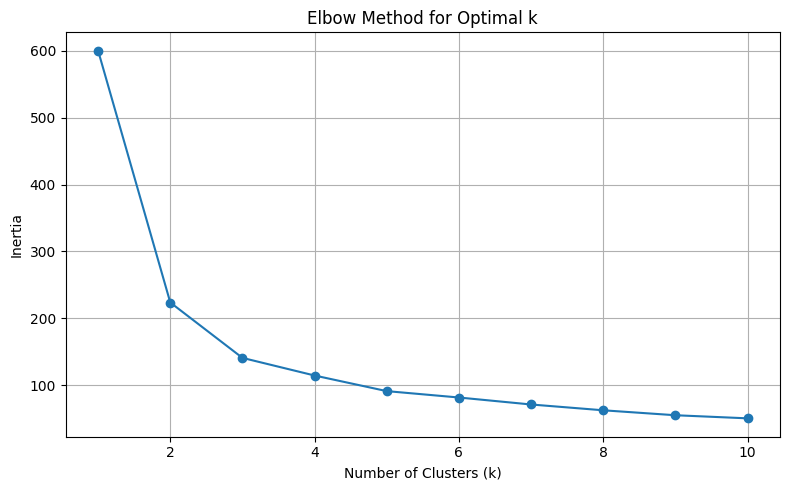

In [212]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [213]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

Hierarchical Clustering (Dendrogram)

In [214]:
linked = linkage(X_scaled, method='ward')

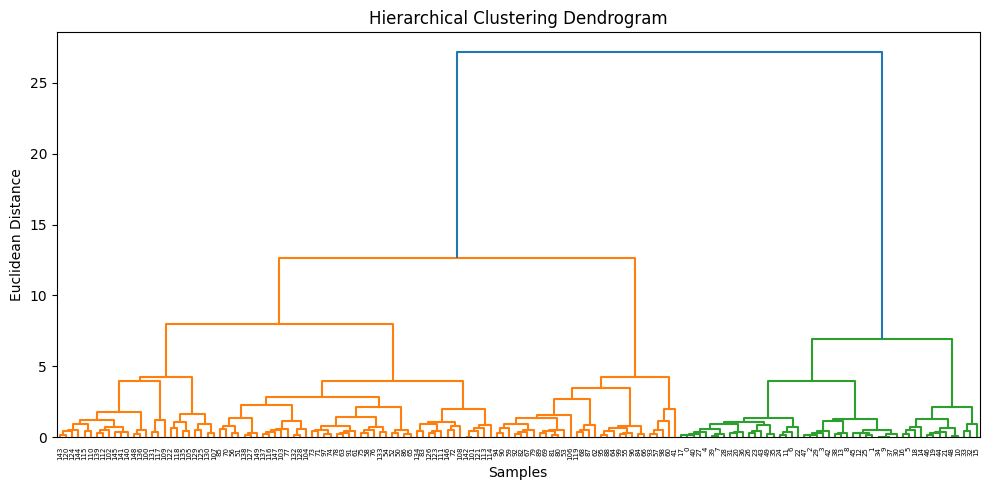

In [215]:
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

In [216]:
hier_labels = fcluster(linked, t=3, criterion='maxclust')

PCA for 2D Visualization

In [217]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

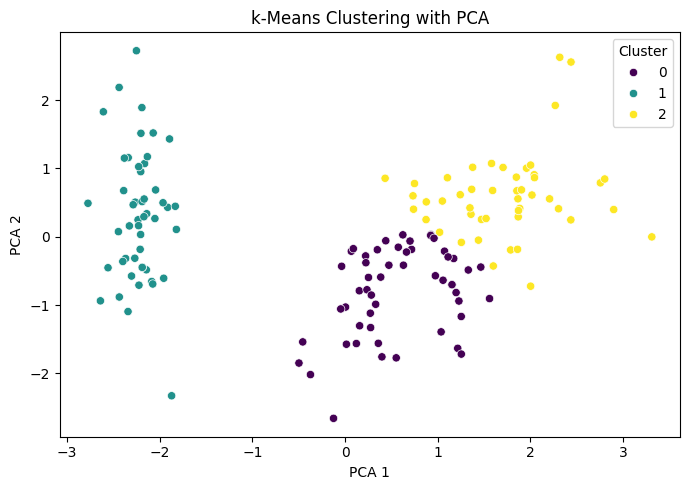

In [218]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('k-Means Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

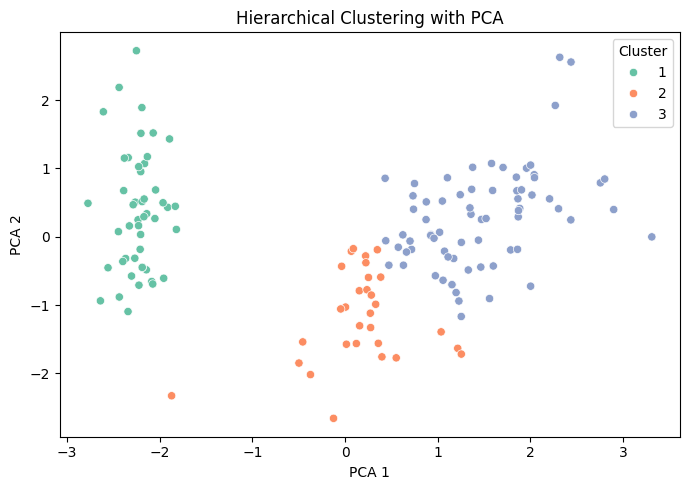

In [219]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hier_labels, palette='Set2')
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()